<h1 align="center">Volume 1: Facial Recognition.</h1>

    R Scott Collings
    Math 345 Sec 002
    26 Nov 2018

In [15]:
import os
import numpy as np
from imageio import imread
from matplotlib import pyplot as plt
from scipy import linalg as spla

### Helper Functions

In [16]:
def get_faces(path="./faces94"):
    """Traverse the specified directory to obtain one image per subdirectory. 
    Flatten and convert each image to grayscale.
    
    Parameters:
        path (str): The directory containing the dataset of images.  
    
    Returns:
        ((mn,k) ndarray) An array containing one column vector per
            subdirectory. k is the number of people, and each original
            image is mxn.
    """
    # Traverse the directory and get one image per subdirectory.
    faces = []
    for (dirpath, dirnames, filenames) in os.walk(path):
        for fname in filenames:
            if fname[-3:]=="jpg":       # Only get jpg images.
                # Load the image, convert it to grayscale,
                # and flatten it into a vector.
                faces.append(np.ravel(imread(dirpath+"/"+fname, as_gray=True)))
                break
    # Put all the face vectors column-wise into a matrix.
    return np.transpose(faces)


def sample_faces(k, path="./faces94"):
    """Generate k sample images from the given path.

    Parameters:
        n (int): The number of sample images to obtain. 
        path(str): The directory containing the dataset of images.  
    
    Yields:
        ((mn,) ndarray): An flattend mn-array representing a single
        image. k images are yielded in total.
    """
    files = []
    for (dirpath, dirnames, filenames) in os.walk(path):
        for fname in filenames:
            if fname[-3:]=="jpg":       # Only get jpg images.
                files.append(dirpath+"/"+fname)

    # Get a subset of the image names and yield the images one at a time.
    test_files = np.random.choice(files, k, replace=False)
    for fname in test_files:
        yield np.ravel(imread(fname, as_gray=True))

### Problem 1 

- Implement `show()`.
- Use `show()` to display a face from the `faces94` dataset.

In [17]:
def show(image, m=200, n=180):
    """Plot the flattened grayscale 'image' of width 'w' and height 'h'.
    
    Parameters:
        image ((mn,) ndarray): A flattened image.
        m (int): The original number of rows in the image.
        n (int): The original number of columns in the image.
    """
    #reshape the image to proper dimensions
    image = image.reshape(m,n)
    #display image
    plt.imshow(image, cmap="gray")
    plt.show()

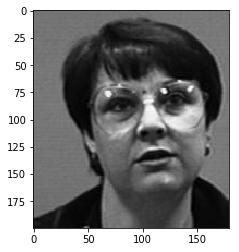

In [18]:
F = get_faces()
show(F[:,12])

In [28]:
class FacialRec(object):
    """Class for storing a database of face images, with methods for
    matching other faces to the database.
    
    Attributes:
        F ((mn,k) ndarray): The flatten images of the dataset, where
            k is the number of people, and each original image is mxn.
        mu ((mn,) ndarray): The mean of all flatten images.
        Fbar ((mn,k) ndarray): The images shifted by the mean.
        U ((mn,k) ndarray): The U in the compact SVD of Fbar;
            the columns are the eigenfaces.
    """
    # Problems 2-3
    def __init__(self, path='./faces94'):
        """Initialize the F, mu, Fbar, and U attributes.
        This is the main part of the computation.
        """
        #construct array with faces
        self.F = get_faces(path)
        #find mean face
        self.mean_face = np.average(self.F, axis=1)
        #find mean-shifted faces
        self.F_bar = self.F - np.vstack(self.mean_face)
        #calculate the eigenfaces of F_bar
        self.U,Sigma,V_T = spla.svd(self.F_bar, full_matrices=False)

    # Problem 3
    def project(self, A, s):
        """Project a face vector onto the subspace spanned by the first s
        eigenfaces, and represent that projection in terms of those eigenfaces.
        
        Parameters:
            A((mn,) or (mn,l) ndarray): The array to be projected. 
            s(int): the number of eigenfaces.
        Returns: 
            ((s,) ndarray): An array of the projected image of s eigenfaces.
        """
        #multiply the first s eigenfaces transposed with the input images to get projection
        return self.U[:,:s].T @ A

    # Problem 5
    def find_nearest(self, g, s=38):
        """Find the index j such that the jth column of F is the face that is
        closest to the face image 'g'.
        
        Parameters:
            g ((mn,) ndarray): A flattened face image.
            s (int): the number of eigenfaces to use in the projection.

        Returns:
            (int): the index of the column of F that is the best match to
                   the input face image 'g'.
        """
        #compute rank s projections for g and F
        g_hat = self.project(g - self.mean_face, s)
        F_hat = self.project(self.F_bar, s)
        #find index of the minimum difference between g_hat and projections in F_hat
        return np.argmin([spla.norm(f_hat - g_hat.T) for f_hat in F_hat.T])

    # Problem 6
    def match(self, image, s=38, m=200, n=180):
        """Display an image along with its closest match from the dataset. 
        
        Parameters:
            image ((mn,) ndarray): A flattened face image.
            s (int): The number of eigenfaces to use in the projection.
            m (int): The original number of rows in the image.
            n (int): The original number of columns in the image.
        """
        #get index of closest face in data set
        j = self.find_nearest(image,s)
        #reshape faces to image dimensions
        image = image.reshape(m,n)
        face = self.F[:,j].reshape(m,n)
        #show face in question next to closest match
        plt.subplot(121)
        plt.imshow(image, cmap='gray')
        plt.gca().set_title('original face')
        plt.subplot(122)
        plt.imshow(face, cmap='gray')
        plt.gca().set_title('best match')
        plt.show()

### Problem 2

- In `FacialRec.__init__()`, compute $F$, the mean face $\boldsymbol{\mu}$, and the mean-shifted faces $\bar{F}$.
Store each as an attribute.

- Initialize a `FacialRec` object and display its mean face, plus an original image and its shifted face.

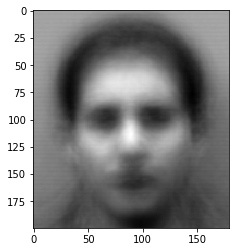

In [21]:
FR = FacialRec()
show(FR.mean_face)

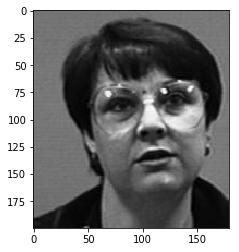

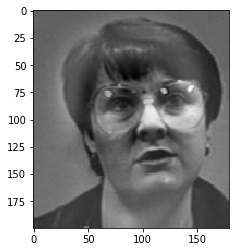

In [22]:
FR = FacialRec()
show(FR.F[:,12])
show(FR.F_bar[:,12])

### Problem 3

- In `FacialRec.__init__()`, compute the compact SVD of $\bar{F}$ and store the $U$ as an attribute.
- Use `show()` to display some of the eigenfaces (the columns of $U$).
- Implement `FacialRec.project()` (in a single line).


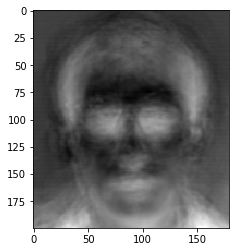

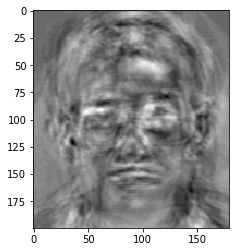

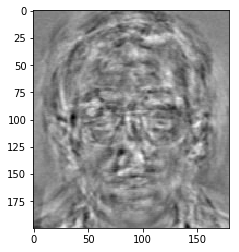

In [24]:
FR = FacialRec()
show(FR.U[:,0])
show(FR.U[:,50])
show(FR.U[:,100])

### Problem 4

- Select one of the shifted images $\bar{\mathbf{f}}_i$.
- For at least 4 values of $s$, use `FacialRec.project()` to compute the corresponding $s$-projection $\widehat{\mathbf{f}}_i$, then compute the reconstruction $\widetilde{\mathbf{f}}_i$.
- Display each of the reconstructions and the original image.

In [25]:
def prob4(s_vals=[5,19,40,75], index=12):
    """
        Instantiate a FacialRec object that draws from the faces94 dataset. Select one
    of the shifted images f_bar_i. For at least 4 values of s, use your method from Problem 3
    to compute the corresponding s-projections f_hat_i, then use (7.3) to compute the reconstruction f_tilda_i. Display the
    various reconstruction and the original image. Compare your results to Figure 7.3

    Parameters:
        s_vals: array of rank values to estimate image with s eigenfaces
        index: image index of data set
    """
    #compute each eigenface decomposition for rank in s_vals
    FR = FacialRec()
    f_bar = FR.F_bar[:,index]
    f_hats = [FR.project(f_bar, s) for s in s_vals]
    for i in range(len(f_hats)):
        #compute each reconstruction and plot on separate figure
        f_tilda = FR.U[:,:s_vals[i]] @ f_hats[i] + FR.mean_face
        f_tilda = f_tilda.reshape(200,180)
        plt.clf()
        plt.imshow(f_tilda, cmap='gray')
        plt.gcf().suptitle('A reconstruction with s = ' + str(s_vals[i]))
        plt.show()
    #plot original image
    plt.clf()
    original = FR.F[:,index].reshape(200,180)
    plt.imshow(original,cmap='gray')
    plt.gcf().suptitle('Original image')
    plt.show()

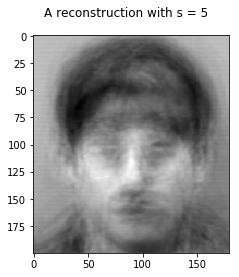

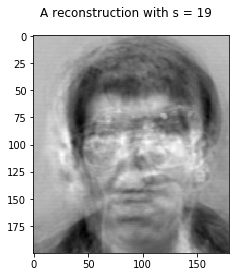

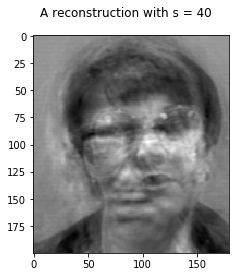

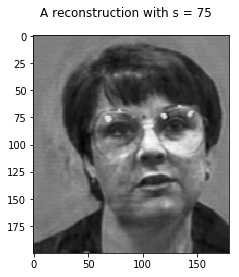

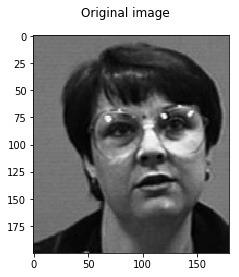

In [26]:
prob4()

### Problem 5 
Implement `FacialRec.find_nearest()`.

### Problem 6

- Implement `FacialRec.match()`.
- Generate some random faces with `sample_faces()`, and use `FacialRec.match()` to find the closest match (let $s=38$).
- For each test, display the sample image and its closest match.

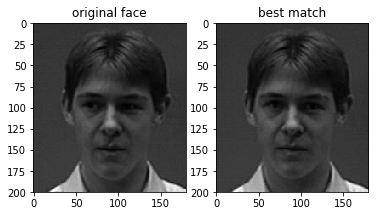

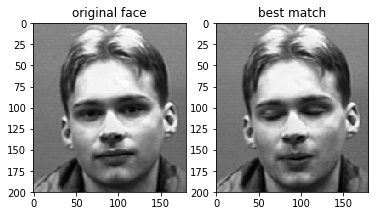

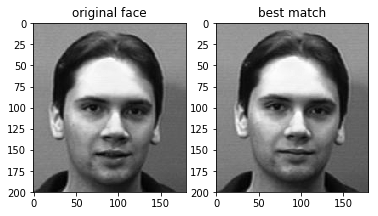

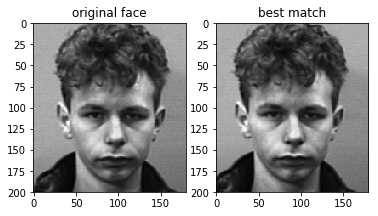

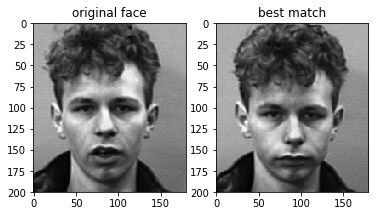

In [29]:
FR = FacialRec()
for test_image in sample_faces(5):
    FR.match(test_image)